# **Modeling**

# Part 1: Preparing the Data

In [235]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [236]:
os.getcwd()

'/workspace'

In [237]:
data = pd.read_csv('Crime_Clean2.csv')

In [238]:
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-07-01,29,19,0.0,13.5,6,15,03:26 AM,05:42 PM,05:47 AM,...,13,23,83,12.3,1014,29,8,193,8,"gaithersburg,md"
1,2016-07-02,27,16,0.0,14.5,6,8,04:14 AM,06:47 PM,05:47 AM,...,15,8,68,0.8,1018,27,10,329,10,"gaithersburg,md"
2,2016-07-03,23,17,0.0,14.5,5,1,05:09 AM,07:48 PM,05:48 AM,...,9,50,76,0.7,1020,23,7,223,6,"gaithersburg,md"
3,2016-07-04,21,17,0.0,9.3,5,0,06:07 AM,08:42 PM,05:48 AM,...,14,99,96,15.2,1017,21,5,182,9,"gaithersburg,md"
4,2016-07-05,31,21,0.0,14.5,6,0,07:09 AM,09:31 PM,05:49 AM,...,14,50,80,13.0,1011,31,9,269,10,"gaithersburg,md"


In [239]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [240]:
len(data)

235368

In [241]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [242]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [243]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [244]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [245]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [246]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [247]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [248]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Part 2: Grouping the Data by Day

In [249]:
df = data.groupby(['Day']).size().reset_index(name='Count')
df

,Day,Count
0,2016-07-01,200
1,2016-07-02,146
2,2016-07-03,119
3,2016-07-04,99
4,2016-07-05,139
...,...,...
1676,2021-02-01,45
1677,2021-02-02,57
1678,2021-02-03,64
1679,2021-02-04,50


In [250]:
df2 = data.groupby(['Day','Crime Name1']).size().reset_index(name='Count')
df2

,Day,Crime Name1,Count
0,2016-07-01,Crime Against Person,21
1,2016-07-01,Crime Against Property,112
2,2016-07-01,Crime Against Society,67
3,2016-07-02,Crime Against Person,19
4,2016-07-02,Crime Against Property,58
...,...,...,...
5038,2021-02-04,Crime Against Property,40
5039,2021-02-04,Crime Against Society,8
5040,2021-02-05,Crime Against Person,1
5041,2021-02-05,Crime Against Property,5


In [251]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Day']).size().reset_index(name='Crime Against Person Count')
df2

,Day,Crime Against Person Count
0,2016-07-01,21
1,2016-07-02,19
2,2016-07-03,15
3,2016-07-04,15
4,2016-07-05,18
...,...,...
1676,2021-02-01,5
1677,2021-02-02,7
1678,2021-02-03,8
1679,2021-02-04,2


In [252]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Day,Crime Against Property Count
0,2016-07-01,112
1,2016-07-02,58
2,2016-07-03,58
3,2016-07-04,46
4,2016-07-05,82
...,...,...
1676,2021-02-01,34
1677,2021-02-02,47
1678,2021-02-03,53
1679,2021-02-04,40


In [253]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Day,Crime Against Society Count
0,2016-07-01,67
1,2016-07-02,69
2,2016-07-03,46
3,2016-07-04,38
4,2016-07-05,39
...,...,...
1676,2021-02-01,6
1677,2021-02-02,3
1678,2021-02-03,3
1679,2021-02-04,8


In [254]:
df3 = data.groupby(['Day','Place']).size().reset_index(name='Count')
df3

,Day,Place,Count
0,2016-07-01,Bank - ATM,5
1,2016-07-01,Bank/S&L/Credit Union,2
2,2016-07-01,Commercial - Office Building,4
3,2016-07-01,Convenience Store,1
4,2016-07-01,Gas Station,1
...,...,...,...
51467,2021-02-05,Commercial - Office Building,1
51468,2021-02-05,Convenience Store,2
51469,2021-02-05,Other/Unknown,2
51470,2021-02-05,Residence - Single Family,1


In [255]:
df4 = data.groupby(['Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Day,Time_of_Day,Count
0,2016-07-01,Afternoon,45
1,2016-07-01,Early Morning,7
2,2016-07-01,Late Afternoon/Early Evening,27
3,2016-07-01,Late Night,46
4,2016-07-01,Morning,33
...,...,...,...
10053,2021-02-04,Morning,5
10054,2021-02-04,Night,8
10055,2021-02-05,Afternoon,1
10056,2021-02-05,Late Night,3


In [256]:
df5 = data.groupby(['Day','Weekday']).size().reset_index(name='Count')
df5

,Day,Weekday,Count
0,2016-07-01,1.0,200
1,2016-07-02,0.0,146
2,2016-07-03,0.0,119
3,2016-07-04,1.0,99
4,2016-07-05,1.0,139
...,...,...,...
1676,2021-02-01,1.0,45
1677,2021-02-02,1.0,57
1678,2021-02-03,1.0,64
1679,2021-02-04,1.0,50


In [257]:
df6 = data.groupby(['Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Day,Mean Income
0,2016-07-01,106514.025000
1,2016-07-02,98466.287671
2,2016-07-03,103432.134454
3,2016-07-04,100306.131313
4,2016-07-05,105139.136691
...,...,...
1676,2021-02-01,112109.111111
1677,2021-02-02,131124.070175
1678,2021-02-03,104034.656250
1679,2021-02-04,119877.500000


In [258]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Day,Mean Pop
0,2016-07-01,2144.675000
1,2016-07-02,2088.417808
2,2016-07-03,2457.554622
3,2016-07-04,2180.292929
4,2016-07-05,2034.438849
...,...,...
1676,2021-02-01,2029.088889
1677,2021-02-02,1933.000000
1678,2021-02-03,2027.640625
1679,2021-02-04,1990.660000


In [259]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Day,Mean Public Transportation %
0,2016-07-01,0.184065
1,2016-07-02,0.159419
2,2016-07-03,0.165274
3,2016-07-04,0.186869
4,2016-07-05,0.185366
...,...,...
1676,2021-02-01,0.180293
1677,2021-02-02,0.163171
1678,2021-02-03,0.172570
1679,2021-02-04,0.134308


In [260]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Day,Mean Victims
0,2016-07-01,1.030000
1,2016-07-02,1.041096
2,2016-07-03,1.033613
3,2016-07-04,1.070707
4,2016-07-05,1.014388
...,...,...
1676,2021-02-01,1.000000
1677,2021-02-02,1.070175
1678,2021-02-03,1.031250
1679,2021-02-04,1.000000


In [261]:
df_final = pd.merge(df, df6b, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income
0,2016-07-01,200,106514.025000
1,2016-07-02,146,98466.287671
2,2016-07-03,119,103432.134454
3,2016-07-04,99,100306.131313
4,2016-07-05,139,105139.136691


In [262]:
df_final = pd.merge(df_final, df6c, how='left', on=['Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388


In [263]:
df_final2 = pd.merge(df_final,df2, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18
...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2


In [264]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82
...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40


In [265]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39
...,...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34,6
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47,3
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53,3
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40,8


In [266]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Day']).size().reset_index(name=place + " Place Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Day'])
        
    return df_final

In [267]:
df_final3 = func(data,df_final2)
df_final3.shape

(1681, 92)

In [268]:
df_final3.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [269]:
df_final3['Day'] = pd.to_datetime(df_final3['Day'])

In [270]:
import datetime
import calendar

df_final3['Day_Of_Week'] = df_final3['Day'].dt.dayofweek

days= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

df_final3['Day_Of_Week'] = df_final3['Day_Of_Week'].apply(lambda x: days[x])

df_final3['Day_Of_Week'].value_counts()

Friday       241
Thursday     240
Sunday       240
Tuesday      240
Saturday     240
Monday       240
Wednesday    240
Name: Day_Of_Week, dtype: int64

In [271]:
df_final3['Month'] = pd.DatetimeIndex(df_final3['Day']).month

for i, rowseries in df_final3.iterrows():
    if ((df_final3.at[i,'Month'] >=1) & (df_final3.at[i,'Month'] < 4)):
        df_final3.at[i,'Season'] = 'Winter'
    elif ((df_final3.at[i,'Month'] >= 4) & (df_final3.at[i,'Month'] < 7)):
        df_final3.at[i,'Season'] = 'Spring'
    elif ((df_final3.at[i,'Month'] >= 7) & (df_final3.at[i,'Month'] < 10)):
        df_final3.at[i,'Season'] = 'Summer'
    elif ((df_final3.at[i,'Month'] >= 10) & (df_final3.at[i,'Month'] <= 12)):
        df_final3.at[i,'Season'] = 'Fall'

In [272]:
len(df_final3)

1681

In [273]:
data = df_final3.copy()

# Part 3: Creating and Implementing Rolling Window Functions

In [274]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_crime_count_func(data):
        
        data['30 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(30).mean()
        data['30 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(30).mean()
        data['30 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(30).mean()
        
        data['7 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(7).mean()
        data['7 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(7).mean()
        data['7 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(7).mean()
        
        data['2 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(2).mean()
        data['2 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(2).mean()
        data['2 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(2).mean()
        
        data['30 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(30).sum()
        data['30 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(30).sum()
        data['30 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(30).sum()
        
        data['7 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(7).sum()
        data['7 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(7).sum()
        data['7 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(7).sum()
        
        data['2 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(2).sum()
        data['2 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(2).sum()
        data['2 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(2).sum()
        
        return data

In [275]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_acs_count_func(data):
        
        data['30 Rolling Mean Income'] = data['Mean Income'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Pop'] = data['Mean Pop'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Victims'] = data['Mean Victims'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Public Transportation %'] = data['Mean Public Transportation %'].shift(1).rolling(30).mean()  
        
        return data

In [276]:
import re

def rolling_place_count_func(data):
    
    pattern = r'.*\s*(Place)\.*'
    
    for column in data.columns:
        
        if re.match(pattern, column):
            
            data['30 Rolling Mean ' +  column] = data[column].shift(1).rolling(30).mean()
        
    return data

In [277]:
data = rolling_crime_count_func(data)

In [278]:
data = rolling_acs_count_func(data)

In [279]:
data = rolling_place_count_func(data)

In [280]:
len(data)

1681

In [281]:
data.head(9)

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-07-06,142,98814.795775,2193.971831,0.162601,1.021127,14,81,47,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-07-07,116,114520.681034,2160.137931,0.166828,1.077586,14,65,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-07-08,118,100957.923729,2416.169492,0.198177,1.016949,13,63,42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-07-09,92,96765.489130,2086.793478,0.169123,1.010870,9,46,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
data.columns

Index(['Day', 'Count', 'Mean Income', 'Mean Pop',
       'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       'Crime Against Society Count',
       'Air/Bus/Train/Metro Terminal Place Count',
       ...
       '30 Rolling Mean Retail - Video Store Place Count',
       '30 Rolling Mean School/College Place Count',
       '30 Rolling Mean Street - Alley Place Count',
       '30 Rolling Mean Street - Bus Stop Place Count',
       '30 Rolling Mean Street - Commercial Place Count',
       '30 Rolling Mean Street - In vehicle Place Count',
       '30 Rolling Mean Street - Other Place Count',
       '30 Rolling Mean Street - Residential Place Count',
       '30 Rolling Mean Theater Place Count',
       '30 Rolling Mean Wooded Area Place Count'],
      dtype='object', length=200)

In [283]:
data['30 Day Rolling Crimes Against Property Count'].isnull().sum()

30

In [284]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0,inplace=True)

In [285]:
data['30 Day Rolling Crimes Against Property Count'].isnull().sum()

0

In [286]:
## Create crime count target labels for all three crime types

label1 = np.array(data['Crime Against Society Count'])
label2 = np.array(data['Crime Against Property Count'])
label3 = np.array(data['Crime Against Person Count'])

In [287]:
data['Day'] = pd.to_datetime(data['Day'])

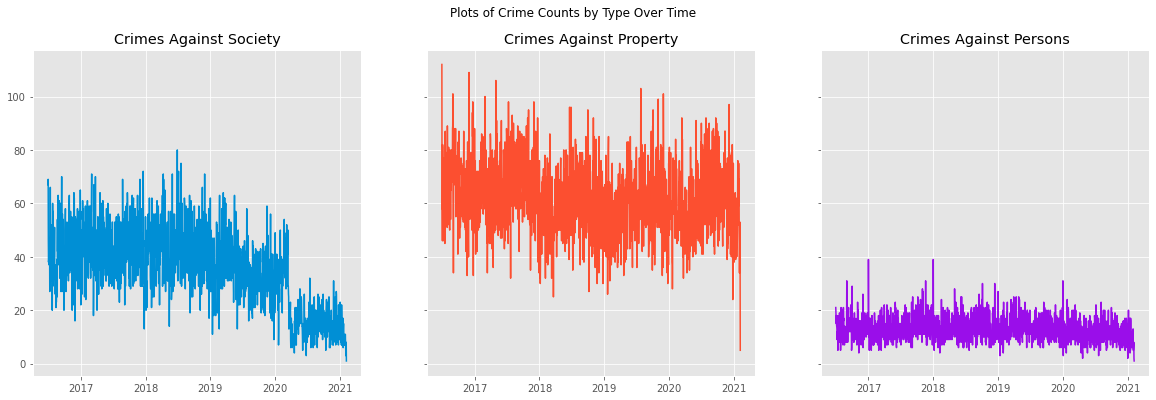

In [288]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

fig.suptitle('Plots of Crime Counts by Type Over Time')

ax1.plot(data['Day'], data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')

ax2.plot(data['Day'], data['Crime Against Property Count'], c = '#fc4f30')
ax2.set_title('Crimes Against Property')

ax3.plot(data['Day'], data['Crime Against Person Count'], c = '#9a0eea')
ax3.set_title('Crimes Against Persons')

plt.show()


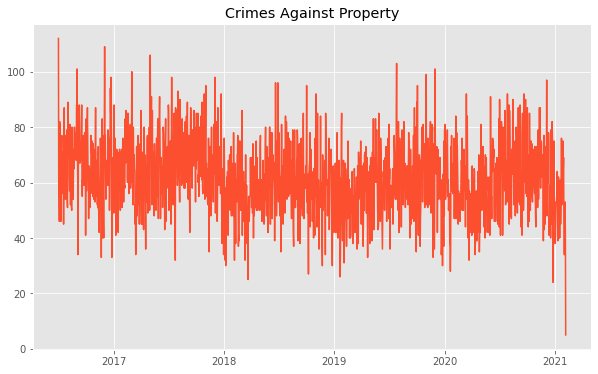

In [289]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(data['Day'], data['Crime Against Property Count'], c = '#fc4f30')
ax1.set_title('Crimes Against Property')
plt.show()

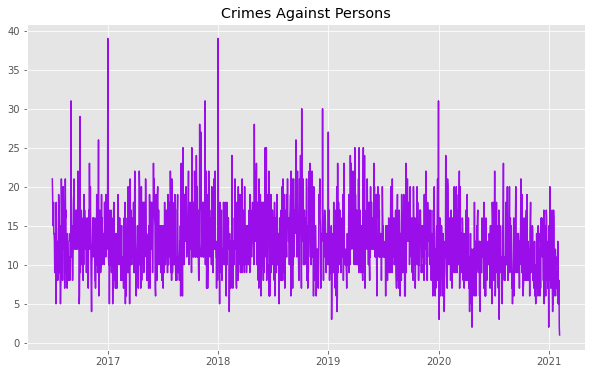

In [290]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(data['Day'], data['Crime Against Person Count'], c = '#9a0eea')
ax1.set_title('Crimes Against Persons')
plt.show()

In [291]:
features = data.copy()

In [292]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data.columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [293]:
columns_to_drop.remove('Day_Of_Week')
columns_to_drop.remove('Day')
columns_to_drop.remove('Season')

In [294]:
data = data.drop(columns_to_drop,axis=1)

In [295]:
data.columns

Index(['Day', 'Day_Of_Week', 'Season',
       '30 Day Rolling Crimes Against Society Mean',
       '30 Day Rolling Crimes Against Property Mean',
       '30 Day Rolling Crimes Against Persons Mean',
       '7 Day Rolling Crimes Against Society Mean',
       '7 Day Rolling Crimes Against Property Mean',
       '7 Day Rolling Crimes Against Persons Mean',
       '2 Day Rolling Crimes Against Society Mean',
       ...
       '30 Rolling Mean Retail - Video Store Place Count',
       '30 Rolling Mean School/College Place Count',
       '30 Rolling Mean Street - Alley Place Count',
       '30 Rolling Mean Street - Bus Stop Place Count',
       '30 Rolling Mean Street - Commercial Place Count',
       '30 Rolling Mean Street - In vehicle Place Count',
       '30 Rolling Mean Street - Other Place Count',
       '30 Rolling Mean Street - Residential Place Count',
       '30 Rolling Mean Theater Place Count',
       '30 Rolling Mean Wooded Area Place Count'],
      dtype='object', length=108)

In [296]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Day_Of_Week'] = le.fit_transform(data['Day_Of_Week'])
data['Season'] = le.fit_transform(data['Season'])

In [297]:
data['Season'].value_counts()

2    460
0    460
3    397
1    364
Name: Season, dtype: int64

In [298]:
data.head()

,Day,Day_Of_Week,Season,30 Day Rolling Crimes Against Society Mean,30 Day Rolling Crimes Against Property Mean,30 Day Rolling Crimes Against Persons Mean,7 Day Rolling Crimes Against Society Mean,7 Day Rolling Crimes Against Property Mean,7 Day Rolling Crimes Against Persons Mean,2 Day Rolling Crimes Against Society Mean,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
0,2016-07-01,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-07-02,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-07-03,3,2,0.0,0.0,0.0,0.0,0.0,0.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-07-04,1,2,0.0,0.0,0.0,0.0,0.0,0.0,57.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-07-05,5,2,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
data = data.drop(['Day'],axis=1)

# Part 4: XGB Model Performances

In [300]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [301]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.04):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [302]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,label1, test_size=0.25, shuffle=False)

In [303]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=4)

xgb.fit(train, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [304]:
best_model = xgb

In [305]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predictions = best_model.predict(test)
mean_absolute_error(test_labels, predictions)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


23.836974223266022

In [306]:
errors = abs(predictions - test_labels)
np.mean(errors)

23.836974223266022

In [307]:
mean_squared_error(test_labels, predictions)

693.9878386381937

In [308]:
mean_absolute_percentage_error(test_labels, predictions)

2.1224204755778033

In [309]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

-112.24204755778032

In [310]:
importances1 = list(best_model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [311]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

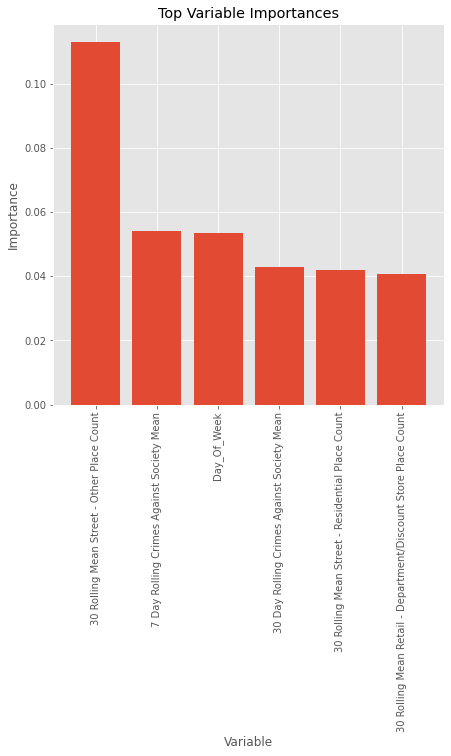

In [312]:
plotImportances(top_importances1, top_features_list1)

In [313]:
test_features = features[1260:]
dates = test_features['Day']

In [314]:
len(test_features)

421

In [315]:
len(test_labels)

421

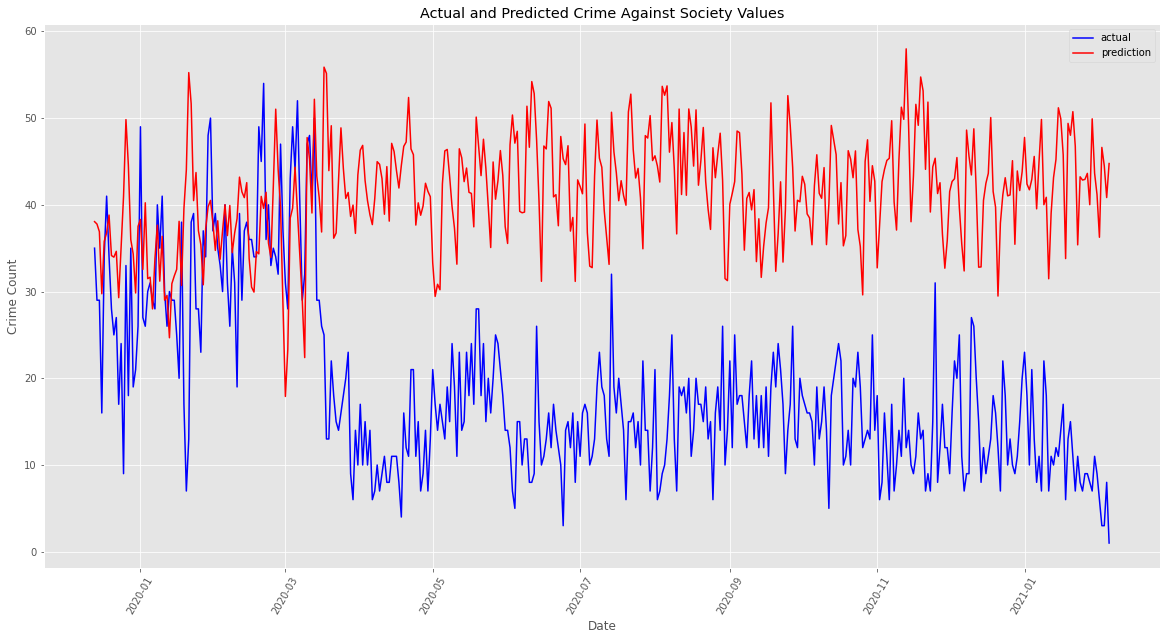

In [316]:
plt.plot(dates, test_labels, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [317]:
train2, test2, train_labels2, test_labels2 = train_test_split(data,label2, test_size=0.25,shuffle=False)

In [318]:
xgb.fit(train2, train_labels2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [319]:
best_model2 = xgb
predictions2 = best_model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


11.340740036228206

In [320]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

11.340740036228206

In [321]:
mean_squared_error(test_labels2, predictions2)

210.87312332156938

In [322]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.23967166477442564

In [323]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

76.03283352255744

In [324]:
importances1 = list(best_model2.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [325]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

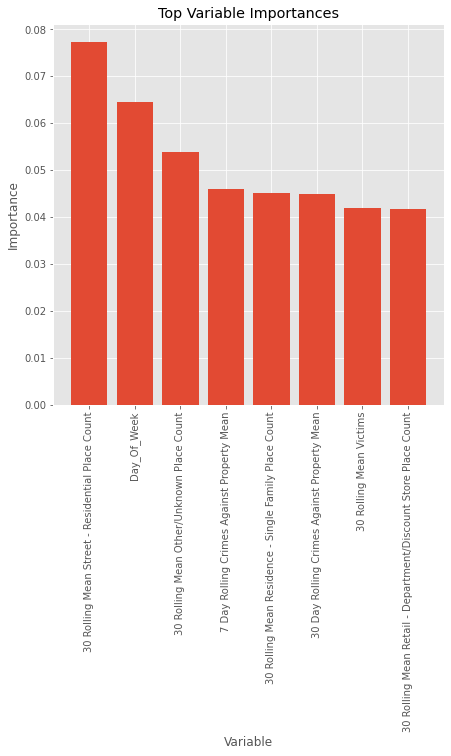

In [326]:
plotImportances(top_importances1, top_features_list1)

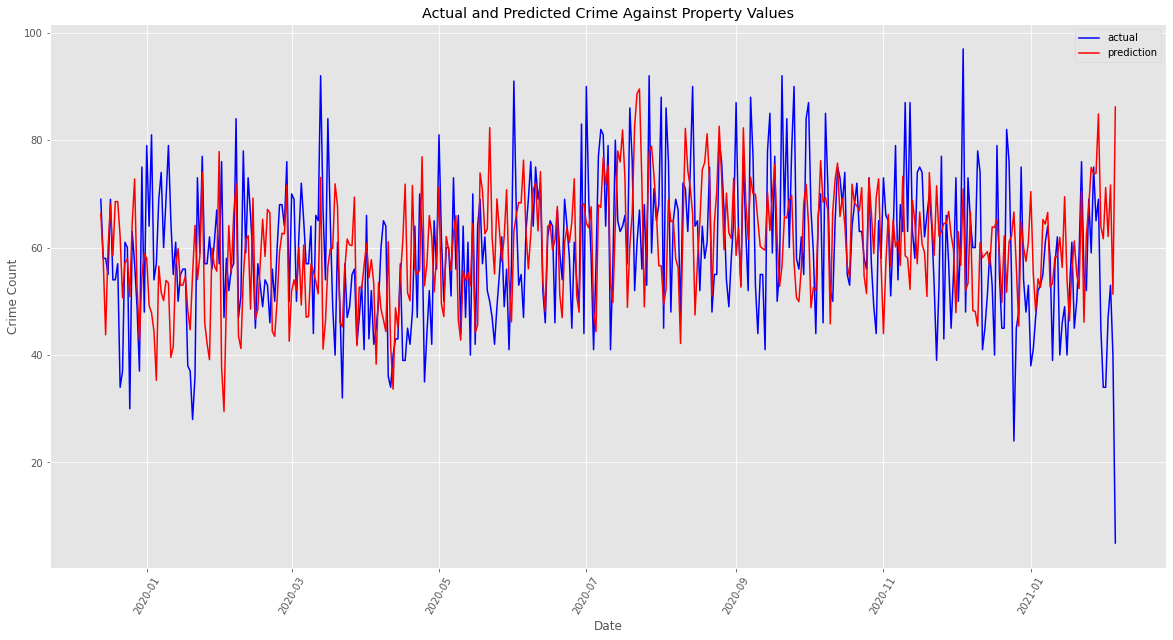

In [327]:
plt.plot(dates, test_labels2, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [328]:
data2 = data.drop(['2 Day Rolling Crimes Against Property Count','2 Day Rolling Crimes Against Society Count',
                 '7 Day Rolling Crimes Against Property Count','7 Day Rolling Crimes Against Society Count',
                 '30 Day Rolling Crimes Against Property Count','30 Day Rolling Crimes Against Society Count',
                  '2 Day Rolling Crimes Against Property Mean','2 Day Rolling Crimes Against Society Mean',
                 '7 Day Rolling Crimes Against Property Mean','7 Day Rolling Crimes Against Society Mean',
                 '30 Day Rolling Crimes Against Property Mean','30 Day Rolling Crimes Against Society Mean'],axis=1)

In [340]:
train3, test3, train_labels3, test_labels3 = train_test_split(data2,label3, test_size=0.25, shuffle=False)

In [341]:
xgb.fit(train3, train_labels3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [342]:
best_model3 = xgb
predictions3 = best_model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


4.9210759183290165

In [343]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

4.9210759183290165

In [344]:
mean_squared_error(test_labels3, predictions3)

37.33719629077852

In [345]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.5846617331534707

In [346]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

41.53382668465294

In [347]:
importances3 = list(best_model3.feature_importances_)
feature_list3 = list(data2.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [348]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

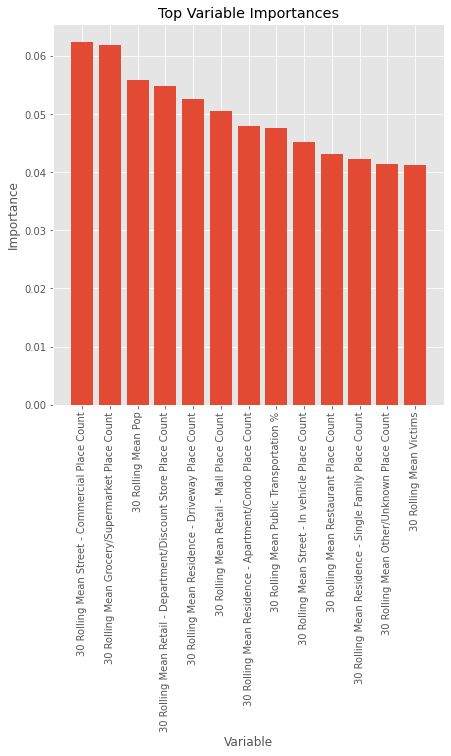

In [349]:
plotImportances(top_importances3, top_features_list3)

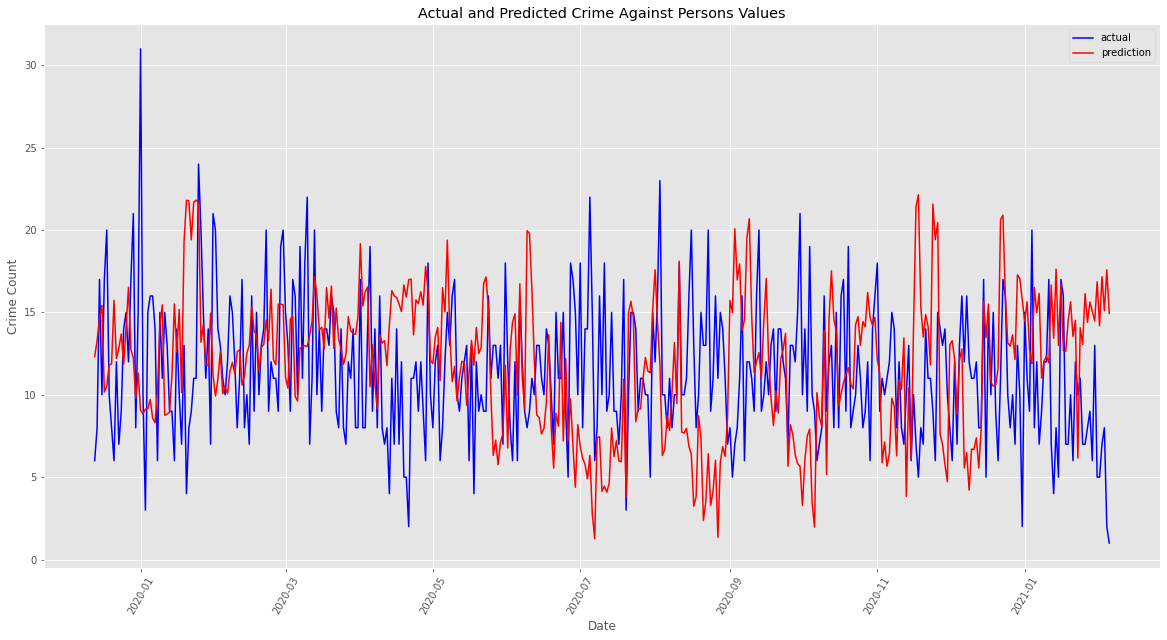

In [350]:
plt.plot(dates, test_labels3, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

# Can Exponential Smoothing Do Better?

In [194]:
d1 = df_final3.drop(['Count','Crime Against Society Count','Crime Against Person Count','Month','Season','Day_Of_Week'],axis=1)
d1.head()

,Day,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Property Count,Air/Bus/Train/Metro Terminal Place Count,Auto Dealership Place Count,Auto Repair Place Count,Bank - ATM Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
0,2016-07-01,106514.025000,2144.675000,0.184065,1.030000,0,NaN,NaN,NaN,5.0,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,98466.287671,2088.417808,0.159419,1.041096,0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,103432.134454,2457.554622,0.165274,1.033613,0,NaN,NaN,2.0,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,100306.131313,2180.292929,0.186869,1.070707,0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,105139.136691,2034.438849,0.185366,1.014388,0,NaN,1.0,1.0,2.0,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [195]:
d1 = d1.set_index(pd.DatetimeIndex(d1['Day']))
d1.head()

,Day,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Property Count,Air/Bus/Train/Metro Terminal Place Count,Auto Dealership Place Count,Auto Repair Place Count,Bank - ATM Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-01,2016-07-01,106514.025000,2144.675000,0.184065,1.030000,0,NaN,NaN,NaN,5.0,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
2016-07-02,2016-07-02,98466.287671,2088.417808,0.159419,1.041096,0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2016-07-03,2016-07-03,103432.134454,2457.554622,0.165274,1.033613,0,NaN,NaN,2.0,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
2016-07-04,2016-07-04,100306.131313,2180.292929,0.186869,1.070707,0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
2016-07-05,2016-07-05,105139.136691,2034.438849,0.185366,1.014388,0,NaN,1.0,1.0,2.0,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [110]:
df_final4 = df_final3.copy()
df_final4.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count,Day_Of_Week,Month,Season
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,4.0,7.0,17.0,2.0,15.0,1.0,NaN,Friday,7,Summer
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,5.0,9.0,30.0,4.0,14.0,NaN,NaN,Saturday,7,Summer
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,1.0,4.0,24.0,4.0,7.0,1.0,1.0,Sunday,7,Summer
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,3.0,17.0,1.0,12.0,NaN,NaN,Monday,7,Summer
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,3.0,NaN,14.0,3.0,8.0,NaN,NaN,Tuesday,7,Summer


In [111]:
new_data = np.array(df_final4.loc[:,'Crime Against Property Count'])

In [112]:
df_final4.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count,Day_Of_Week,Month,Season
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,4.0,7.0,17.0,2.0,15.0,1.0,NaN,Friday,7,Summer
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,5.0,9.0,30.0,4.0,14.0,NaN,NaN,Saturday,7,Summer
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,1.0,4.0,24.0,4.0,7.0,1.0,1.0,Sunday,7,Summer
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,3.0,17.0,1.0,12.0,NaN,NaN,Monday,7,Summer
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,3.0,NaN,14.0,3.0,8.0,NaN,NaN,Tuesday,7,Summer


In [113]:
new_data[0:20]

array([112,  58,  58,  46,  82,  81,  65,  63,  46,  59,  72,  77,  64,
        58,  69,  56,  71,  45,  70,  87])

In [114]:
train_data = new_data[:1260]
test_data = new_data[1260:]

In [115]:
train_data

array([112,  58,  58, ...,  72,  67,  54])

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [117]:
# Train the Scaler with training data and smooth data
#smoothing_window_size = 10
#for di in range(0,1000,smoothing_window_size):
 #   scaler.fit(train_data[di:di+smoothing_window_size,:])
  #  train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
#scaler.fit(train_data[di+smoothing_window_size:,:])
#train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])


In [118]:
scaler.fit(train_data)
train_data = scaler.transform(train_data)
train_data

array([[1.        ],
       [0.37931034],
       [0.37931034],
       ...,
       [0.54022989],
       [0.48275862],
       [0.33333333]])

In [119]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [120]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_data = np.concatenate([train_data,test_data],axis=0)

In [121]:
all_data

array([ 0.1       ,  0.12793103,  0.15306897, ...,  0.32183908,
        0.17241379, -0.22988506])

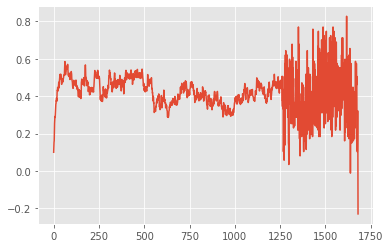

In [122]:
plt.plot(all_data)
plt.show()

In [123]:
window_size = 10
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df_final3.loc[pred_idx,'Day']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00035


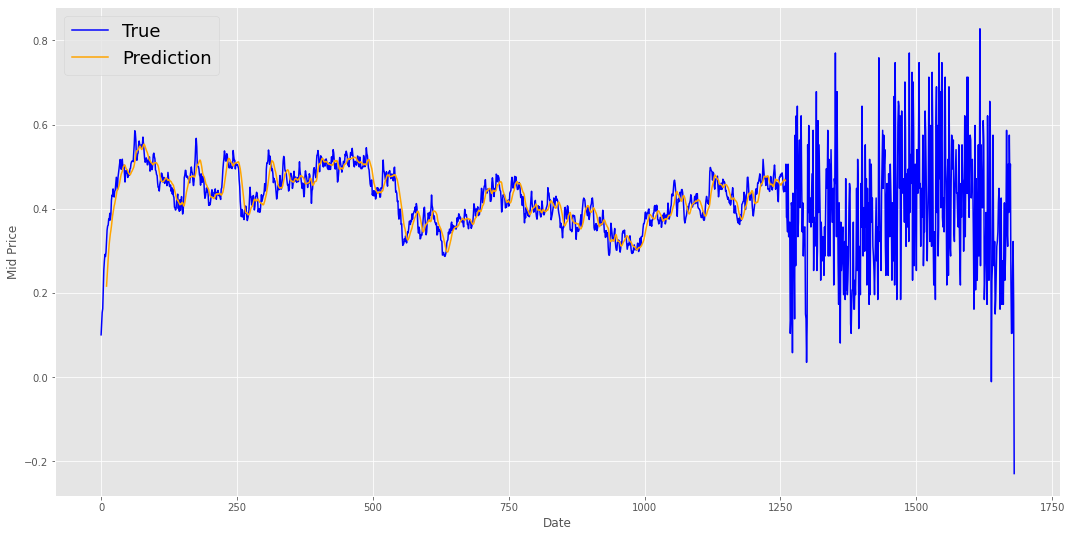

In [124]:
plt.figure(figsize = (18,9))
plt.plot(range(df_final3.shape[0]),all_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [125]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
    
for ti in range(len(test_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  test_data[ti] = EMA    

# Used for visualization and test purposes
comb_data = np.concatenate([train_data,test_data],axis=0)

In [134]:
window_size = 10
N = train_data.size + test_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df_final3.loc[pred_idx,'Day']
        

    std_avg_predictions.append(np.mean(comb_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-comb_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00016


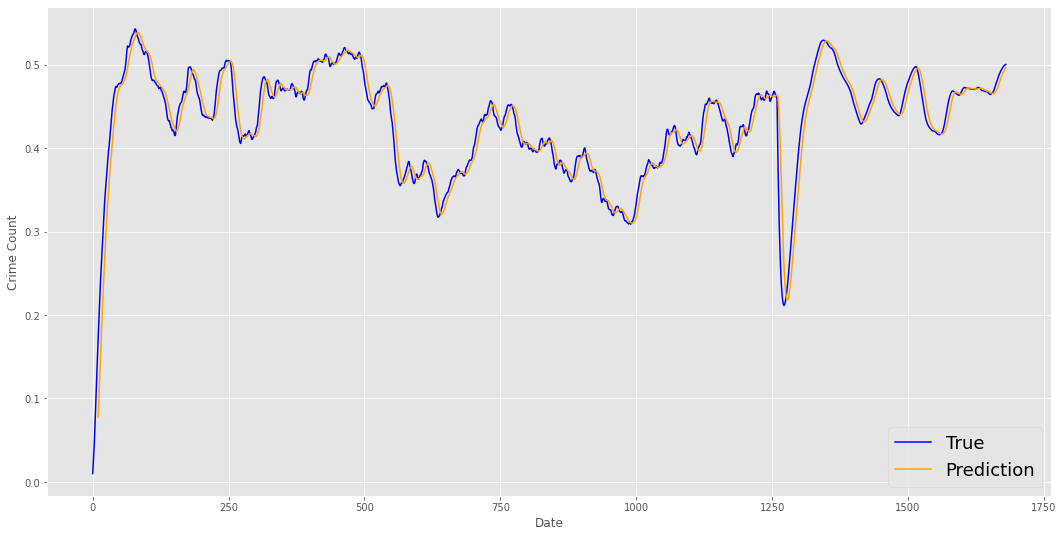

In [140]:
plt.figure(figsize = (18,9))
plt.plot(range(df_final3.shape[0]),comb_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(fontsize=18)
plt.show()

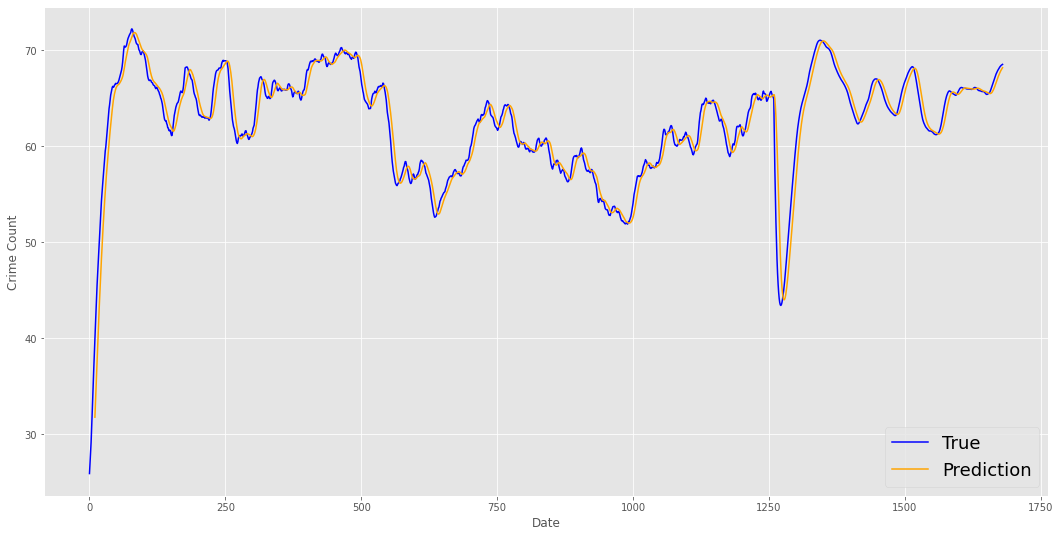

In [145]:
comb_data = comb_data.reshape(-1,1)
orig_true = scaler.inverse_transform(comb_data)
std_avg_predictions = np.array(std_avg_predictions)
std_avg_predictions = std_avg_predictions.reshape(-1,1)
orig_pred = scaler.inverse_transform(std_avg_predictions)

plt.figure(figsize = (18,9))
plt.plot(range(df_final3.shape[0]),orig_true,color='b',label='True')
plt.plot(range(window_size,N),orig_pred,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend(fontsize=18)
plt.show()

In [138]:
len(mse_errors)

1671

In [139]:
print('MSE error for standard averaging on test data: %.5f'%(0.5*np.mean(mse_errors[1620:])))

MSE error for standard averaging on test data: 0.00002


In [150]:
df5 = d1.copy()

In [151]:
train_data=df5[:1260]
test_data = df5[1260:]

In [167]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

alpha = 0.8
simple_model = SimpleExpSmoothing(train_data['Crime Against Property Count']).fit(smoothing_level=alpha)
double_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add').fit()
triple_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add',seasonal='add').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [168]:
preds_simple = simple_model.forecast(421)
preds_double = double_model.forecast(421)
preds_triple = triple_model.forecast(421)

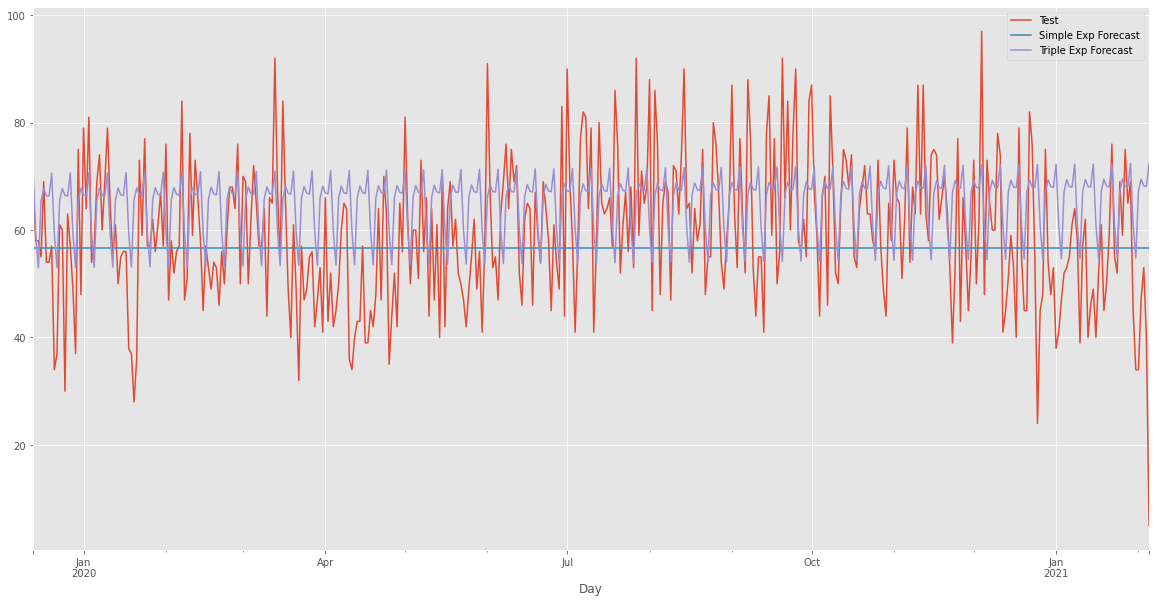

In [169]:
test_data['Crime Against Property Count'].plot(legend=True,label='Test')
preds_simple.plot(legend=True, label = 'Simple Exp Forecast')
preds_triple.plot(legend=True, label = 'Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [163]:
mean_absolute_error(test_data['Crime Against Property Count'], preds_triple)

10.962979406392607

In [165]:
mean_squared_error(test_data['Crime Against Property Count'], preds_triple)

194.51464600626673

In [164]:
mean_absolute_percentage_error(test_data['Crime Against Property Count'], preds_triple)

0.24162055049690792

# Can Neural Networks do Better?

In [215]:
df = d1.copy()

In [216]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 7
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 100

In [217]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [218]:
df.head()

,Day,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Property Count,Air/Bus/Train/Metro Terminal Place Count,Auto Dealership Place Count,Auto Repair Place Count,Bank - ATM Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-01,2016-07-01,106514.025000,2144.675000,0.184065,1.030000,112,NaN,NaN,NaN,5.0,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
2016-07-02,2016-07-02,98466.287671,2088.417808,0.159419,1.041096,58,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2016-07-03,2016-07-03,103432.134454,2457.554622,0.165274,1.033613,58,NaN,NaN,2.0,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
2016-07-04,2016-07-04,100306.131313,2180.292929,0.186869,1.070707,46,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
2016-07-05,2016-07-05,105139.136691,2034.438849,0.185366,1.014388,82,NaN,1.0,1.0,2.0,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [219]:
df = df.drop('Day',axis=1)

In [220]:
features = normalize(df.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.178439,-0.207705,0.810463,0.317786,3.843126,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.303427,NaN,NaN,NaN,NaN
1,-1.292747,-0.694250,-1.061765,0.882911,-0.327941,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.721970,NaN,NaN,NaN,NaN
2,-0.384954,2.498266,-0.616992,0.501823,-0.327941,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.787171,NaN,NaN,NaN,NaN
3,-0.956410,0.100341,1.023437,2.391040,-1.254844,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.303427,NaN,NaN,NaN,NaN
4,-0.072901,-1.161093,0.909286,-0.477325,1.525867,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.770826,NaN,NaN,NaN,NaN


In [221]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0,inplace=True)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.178439,-0.207705,0.810463,0.317786,3.843126,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.303427,0.0,0.0,0.0,0.0
1,-1.292747,-0.694250,-1.061765,0.882911,-0.327941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.721970,0.0,0.0,0.0,0.0
2,-0.384954,2.498266,-0.616992,0.501823,-0.327941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.787171,0.0,0.0,0.0,0.0
3,-0.956410,0.100341,1.023437,2.391040,-1.254844,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.303427,0.0,0.0,0.0,0.0
4,-0.072901,-1.161093,0.909286,-0.477325,1.525867,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.770826,0.0,0.0,0.0,0.0


In [222]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [223]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(87)]].values
y_train = features.iloc[start:end][[4]]

In [224]:
sequence_length = int(past/step)
sequence_length

7

In [225]:
import tensorflow as tf
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [226]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(87)]].values
y_val = features.iloc[label_start:][[4]]

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [227]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 7, 87)
Target shape: (256, 1)


In [228]:
inputs = tf.keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = tf.keras.layers.LSTM(32)(inputs)
outputs = tf.keras.layers.Dense(1)(lstm_out)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 87)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                15360     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 15,393
Trainable params: 15,393
Non-trainable params: 0
_________________________________________________________________


In [229]:
path_checkpoint = "model_checkpoint.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.0615
Epoch 00001: val_loss improved from inf to 1.17900, saving model to model_checkpoint.h5
5/5 [==============================] - 0s 72ms/step - loss: 1.0615 - val_loss: 1.1790
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 1.0198
Epoch 00002: val_loss improved from 1.17900 to 1.13731, saving model to model_checkpoint.h5
5/5 [==============================] - 0s 28ms/step - loss: 1.0198 - val_loss: 1.1373
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.9911
Epoch 00003: val_loss improved from 1.13731 to 1.09844, saving model to model_checkpoint.h5
5/5 [==============================] - 0s 28ms/step - loss: 0.9911 - val_loss: 1.0984
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.9684
Epoch 00004: val_loss improved from 1.09844 to 1.06486, saving model to model_checkpoint.h5
5/5 [==============================] - 0s 32ms/step - loss: 0.9684 - val_loss: 1.0

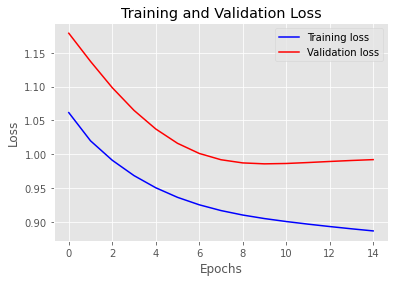

In [232]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()